# Algerian Forest Fire Dataset

In [1]:
# importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
# Reading the dataset
dataset = pd.read_csv('Algerian_forest_fires_dataset.csv')
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
# finding the shape of the dataset
dataset.shape

(247, 14)

OBSERVATIONS: It seems like it is a very small dataset with 247 rows and 14 columns.                                             
              In this dataset we have 2 regions namely Bejaia has 122 records and Sidi Bel-abbes has 122 records

# Exploratory Data Analysis

In [4]:
dataset.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [5]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
dataset[dataset.isnull().all(axis='columns')]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


OBSERVATIONS: here we have the data for sidi-Bel Abbes Region from row 123 so we can create a new column region

In [7]:
# creating a new column for region
dataset.loc[:122 ,'Region'] = 0
dataset.loc[123: ,'Region'] = 1

# droping NAN rows
dataset = dataset.dropna().reset_index(drop = True)

OBSERVATIONS : Now we have replaced Bejaia = 0 and sidi-Bel Abbes Region = 1

In [8]:
dataset.shape

(244, 15)

In [9]:
dataset.loc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [10]:
# dropping index 122
dataset = dataset.drop(122).reset_index(drop = True)

In [11]:
dataset.shape

(243, 15)

OBSERVATIONS : Now we have 243 rows and 15 columns

In [12]:
# Copying the dataset
df = dataset.copy()

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [14]:
#checking null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

OBSERVATIONS : There is no Null values

In [15]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4    RH          243 non-null    object 
 5    Ws          243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


OBSERVATIONS : There are 14 categorical and 1 numerical features

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

OBSERVATIONS : As we have spaces in column names we can strip it

In [17]:
df.columns = df.columns.str.strip()

In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [19]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

<AxesSubplot:xlabel='Classes', ylabel='count'>

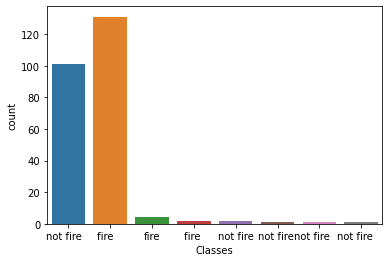

In [20]:
# Univariate Analysis
sns.countplot(data = df, x = 'Classes')

OBSERVATIONS : we have to strip the target column as well

In [21]:
df['Classes'] = df['Classes'].str.strip()

In [22]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

OBSERVATIONS : Now we got 2 unique values in the Target Feature, 'Fire' and 'Not Fire'

<AxesSubplot:xlabel='Classes', ylabel='count'>

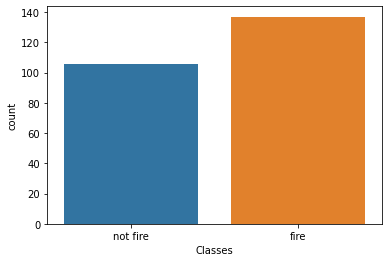

In [23]:
# Univariate Analysis
sns.countplot(data = df, x = 'Classes')

OBSERVATIONS : We can clearly see that the area fired is larger than the area not fired

<AxesSubplot:xlabel='Region', ylabel='count'>

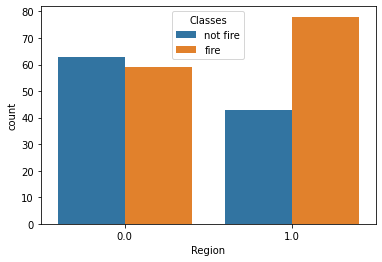

In [24]:
sns.countplot(data = df, x = 'Region', hue = 'Classes')

OBSERVATIONS : We can clearly see that the area fired in sidi-Bel Abbes Region is very high

<AxesSubplot:xlabel='month', ylabel='count'>

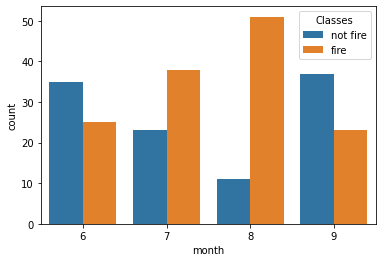

In [25]:
sns.countplot(data = df, x = 'month', hue = 'Classes')

OBSERVATIONS : We can see that the fire got spread high in the month of August

<AxesSubplot:xlabel='month', ylabel='count'>

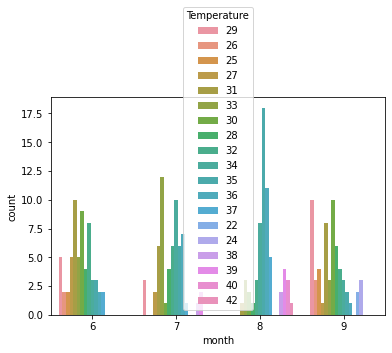

In [26]:
sns.countplot(data = df, x = 'month', hue = 'Temperature')

OBSERVATIONS : The Highest number of times the hot temperature sustained in the month of August

<AxesSubplot:xlabel='Temperature', ylabel='count'>

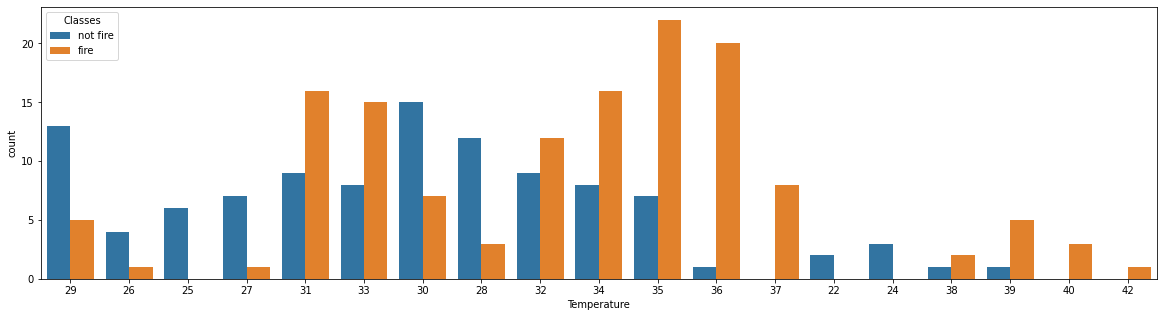

In [27]:
# Visualizing whether the temperature could also be a reason for fire or not
plt.figure(figsize=(20,5))
sns.countplot(x = 'Temperature',data = df,hue = 'Classes')

OBSERVATIONS : It seems that the fire got increased when the temperature raised

In [28]:
df['year'].unique()

array(['2012'], dtype=object)

In [29]:
df.shape

(243, 15)

In [30]:
#Encoding Target feature
df['Classes'] = np.where(df['Classes'] == 'not fire' ,0,1)

OBERVATIONS : Encoding 'not fire' = 0 and 'fire' = 1

In [31]:
# checking Data is balanced or not
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

# Splitting data into train and test

In [32]:
X = df.drop(columns = ['Classes'])
y = df['Classes']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)

In [34]:
X_train.shape

(170, 14)

In [35]:
y_train.shape

(170,)

In [36]:
X_test.shape

(73, 14)

In [37]:
y_test.shape

(73,)

# Data Preprocessing on Train and Test data

In [38]:
X_train.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
dtype: int64

In [39]:
X_test.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
dtype: int64

OBSERVATIONS : There is no null values in train and test data

In [40]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes          int32
Region         float64
dtype: object

In [41]:
# Converting the dtypes 
X_train = X_train.astype({'day' : int,'month' : int, 'year' : int,'Temperature' : int,'RH' : int,'Ws' : int,'Region' : int})
X_train = X_train.astype({'Rain' : float,'FFMC' : float,'DMC' : float,'DC' : float,'ISI' : float,'BUI' : float,'FWI' :float})
X_test = X_test.astype({'day' : int,'month' : int, 'year' : int,'Temperature' : int,'RH' : int,'Ws' : int,'Region' : int})
X_test = X_test.astype({'Rain' : float,'FFMC' : float,'DMC' : float,'DC' : float,'ISI' : float,'BUI' : float,'FWI' :float})

In [42]:
X_train.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Region           int32
dtype: object

In [43]:
X_test.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Region           int32
dtype: object

In [44]:
y_train.unique()

array([0, 1])

In [45]:
y_train.value_counts()

1    100
0     70
Name: Classes, dtype: int64

In [46]:
y_test.value_counts()

1    37
0    36
Name: Classes, dtype: int64

In [47]:
# Finding Coorelation
X_train.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,0.062996,NaN,0.070720,-0.075157,0.022991,-0.033666,0.186148,0.452093,0.467876,0.182816,0.471813,0.327793,0.084592
month,0.062996,1.000000,NaN,-0.029865,-0.056639,-0.074480,0.039739,0.022951,0.090696,0.162674,0.083054,0.113536,0.109309,-0.047086
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.070720,-0.029865,NaN,1.000000,-0.650623,-0.318634,-0.331731,0.676161,0.484817,0.377729,0.627675,0.461702,0.572181,0.321939
RH,-0.075157,-0.056639,NaN,-0.650623,1.000000,0.267859,0.216749,-0.658829,-0.448995,-0.285920,-0.695484,-0.404365,-0.597090,-0.434017
Ws,0.022991,-0.074480,NaN,-0.318634,0.267859,1.000000,0.304219,-0.247078,-0.072303,0.000246,-0.069566,-0.049457,-0.038416,-0.162755
Rain,-0.033666,0.039739,NaN,-0.331731,0.216749,0.304219,1.000000,-0.493266,-0.259379,-0.282252,-0.326489,-0.272397,-0.298655,-0.124946
FFMC,0.186148,0.022951,NaN,0.676161,-0.658829,-0.247078,-0.493266,1.000000,0.619200,0.543761,0.760974,0.613633,0.699432,0.268313
DMC,0.452093,0.090696,NaN,0.484817,-0.448995,-0.072303,-0.259379,0.619200,1.000000,0.877566,0.715397,0.985142,0.895125,0.281624
DC,0.467876,0.162674,NaN,0.377729,-0.285920,0.000246,-0.282252,0.543761,0.877566,1.000000,0.567555,0.945141,0.775546,0.015524


<AxesSubplot:>

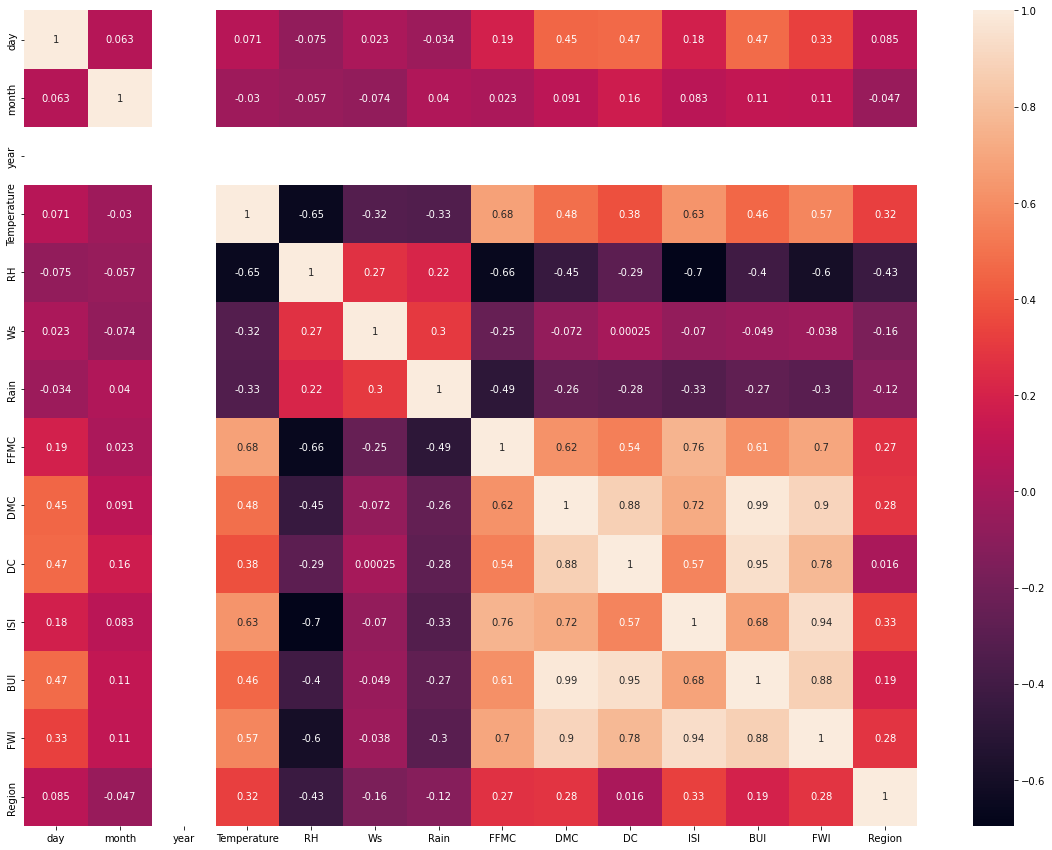

In [48]:
plt.figure(figsize = (20,15))
sns.heatmap(X_train.corr(), annot=True)

OBSERVATIONS :                                                                                                               
    Temperature is highly correlated with RH, FFMC, ISI, FWI                                                                    
    RH is highly correlated with Temperature, FFMC, ISI, FWI                                                        
    FFMC is highly correlated with RH, DMC, DC, ISI, BUI, FWI                                                      
    DMC is highly correlated with FFMC, DC, ISI, BUI, FWI                                                          
    DC is highly Correlated with FFMC, DMC, ISI, BUI, FWI                                                       
    ISI is highly correlated with Temperature, RH, FFMC, DMC, DC, BUI, FWI                                                    
    BUI is highly correlated with FFMC, DMC, DC, ISI, FWI                                                                       
    FWI is highly correlated with Temperature, RH, FFMC, DMC, DC, ISI, BUI                                                
    

In [49]:
# finding features that are more than 80% correlated
def correlation(datas, threshold):
    col_corr = set()
    corr_matrix = datas.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [50]:
correlated_features = correlation(X_train,0.8)
correlated_features

{'BUI', 'DC', 'FWI'}

so here BUI, DC, FWI are more than 80% correlated and so we can drop it and also we can drop day, month, year features

In [51]:
# droping features
X_train.drop(columns=['BUI','DC','FWI','day','month','year'],axis=1,inplace=True)
X_test.drop(columns=['BUI','DC','FWI','day','month','year'],axis=1,inplace=True)

In [52]:
X_train.reset_index(inplace=True)

In [53]:
X_test.reset_index(inplace=True)

In [54]:
X_train.drop(columns='index',axis=1,inplace=True)
X_test.drop(columns='index',axis=1,inplace=True)

In [55]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region
0,33,73,12,1.8,59.9,2.2,0.7,0
1,31,64,15,0.0,86.7,14.2,5.7,0
2,31,65,18,0.0,84.3,12.5,4.8,0
3,30,77,21,1.8,58.5,1.9,1.1,0
4,33,70,17,0.0,85.4,18.5,5.2,0


In [56]:
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region
0,36,53,19,0.0,89.2,17.1,10.0,0
1,34,71,14,6.5,64.5,3.3,1.0,1
2,32,51,13,0.0,88.7,16.0,6.9,1
3,29,73,17,0.1,68.4,1.9,1.4,0
4,34,56,15,2.9,74.8,7.1,1.6,1


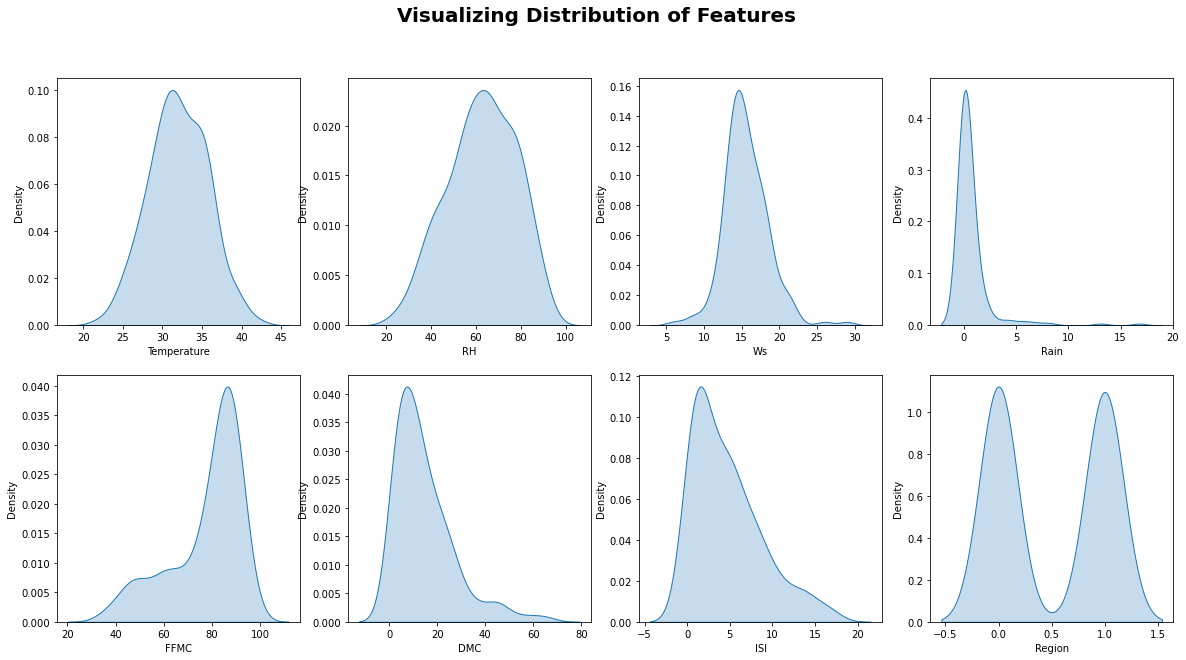

In [57]:
# Visualizing the Distribution

plt.figure(figsize=(20,10))
plt.suptitle('Visualizing Distribution of Features',fontsize = 20, fontweight = 'bold')

for i in range(0,len(X_train.columns)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(x = X_train[X_train.columns[i]], shade=True)

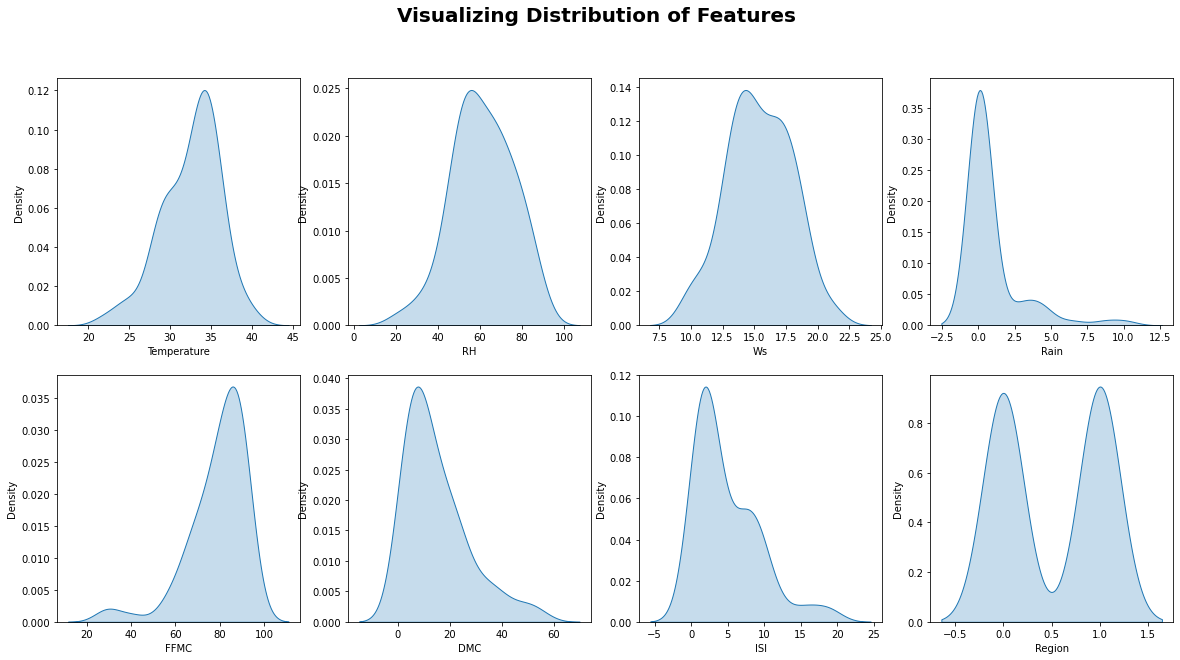

In [58]:
# Visualizing the Distribution

plt.figure(figsize=(20,10))
plt.suptitle('Visualizing Distribution of Features',fontsize = 20, fontweight = 'bold')

for i in range(0,len(X_test.columns)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(x = X_test[X_test.columns[i]], shade=True)

# Feature Scaling

In [59]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [60]:
X_train_scaled

array([[ 0.2768811 ,  0.70529363, -1.21076039, ..., -0.99829831,
        -0.98570585, -0.98830369],
       [-0.270442  ,  0.10445886, -0.18503315, ..., -0.03197397,
         0.25206926, -0.98830369],
       [-0.270442  ,  0.17121827,  0.84069409, ..., -0.16886992,
         0.02926974, -0.98830369],
       ...,
       [-1.09142665,  1.6399255 , -0.18503315, ..., -0.65203209,
        -1.13423887,  1.01183473],
       [ 0.55054265, -1.4977672 ,  0.84069409, ...,  3.35821393,
         2.38104246,  1.01183473],
       [-0.54410355,  0.70529363,  0.49878501, ..., -0.9660875 ,
        -0.88668385, -0.98830369]])

In [61]:
X_test_scaled

array([[ 1.09786575e+00, -6.29894755e-01,  1.18260317e+00,
        -3.51344403e-01,  7.94125580e-01,  2.01554415e-01,
         1.31655586e+00, -9.88303691e-01],
       [ 5.50542648e-01,  5.71774790e-01, -5.26942228e-01,
         2.89748878e+00, -8.81350911e-01, -9.09718576e-01,
        -9.11439348e-01,  1.01183473e+00],
       [ 3.21954765e-03, -7.63413593e-01, -8.68851308e-01,
        -3.51344403e-01,  7.60209052e-01,  1.12974684e-01,
         5.49135290e-01,  1.01183473e+00],
       [-8.17765103e-01,  7.05293628e-01,  4.98785010e-01,
        -3.01362354e-01, -6.16801991e-01, -1.02245642e+00,
        -8.12417338e-01, -9.88303691e-01],
       [ 5.50542648e-01, -4.29616497e-01, -1.85033149e-01,
         1.09813502e+00, -1.82670430e-01, -6.03715868e-01,
        -7.62906334e-01,  1.01183473e+00],
       [ 8.24204199e-01, -5.63135336e-01, -1.55266947e+00,
        -3.01362354e-01,  4.21043771e-01, -4.99030732e-01,
        -3.91573799e-01,  1.01183473e+00],
       [-1.91241130e+00,  1.573166

# Model Building

In [62]:
#Logistic Regression
Logistic = LogisticRegression()
Logistic.fit(X_train_scaled,y_train)

LogisticRegression()

In [63]:
print('intercept value',Logistic.intercept_)
print('slope value',Logistic.coef_)

intercept value [1.24236416]
slope value [[0.28937305 0.41153979 0.02255954 0.14680038 2.56456001 0.93944141
  2.72338307 0.12505735]]


# Evaluating the model

In [64]:
print('Training_score',Logistic.score(X_train_scaled,y_train))
print('Testing_score',Logistic.score(X_test_scaled,y_test))

Training_score 0.9705882352941176
Testing_score 0.9315068493150684


In [65]:
# Predicting the y_test data
Logistic.predict = Logistic.predict(X_test_scaled)
Logistic.predict

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1])

In [66]:
accuracy_score = accuracy_score(y_test,Logistic.predict)
Classification_Report = classification_report(y_test,Logistic.predict)

print('Logistic Regression')
print(accuracy_score)
print(Classification_Report)

Logistic Regression
0.9315068493150684
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.90      0.97      0.94        37

    accuracy                           0.93        73
   macro avg       0.93      0.93      0.93        73
weighted avg       0.93      0.93      0.93        73

